## Imports

In [154]:
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [155]:
COFFEE_SHOP_DATA = "../data/Coffee_shop_data.xlsx"
POPULATION_DATA = "../data/population.csv"

## Data injection & Analysis

In [156]:
coffee_df = pd.read_excel(COFFEE_SHOP_DATA)
population_df = pd.read_csv(POPULATION_DATA, skiprows=[0])

In [157]:
coffee_df.sample(10)

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
434,435,Espresso Exuberance,999 Brentwood Alley,San Diego,California,92186,619-625-4810,4.33,Female,86236,5.21380
743,744,Steamy Moments,101 Sunnyside Plaza,San Francisco,California,94132,415-615-6969,4.30,Male,72457,4.33085
535,536,Mugful Magic,952 Ruskin Center,Fresno,California,93794,559-808-7784,1.97,Male,80782,4.90310
984,985,Caffeine Communion,40 Sommers Parkway,San Jose,California,95133,408-304-3646,4.04,Female,78176,4.64680
141,142,Caffeine Carousel,38 Roxbury Plaza,Torrance,California,90510,818-577-1717,4.25,Female,88343,5.39315
181,182,Java Gems,7306 Valley Edge Avenue,Irvine,California,92717,714-210-9646,3.76,Female,73919,4.32795
238,239,Perk & Panache,107 Helena Trail,San Francisco,California,94142,415-822-6533,5.00,Female,87294,5.34070
53,54,Caffeine Craze,78 Eliot Road,Sacramento,California,94297,916-749-8041,4.70,Male,87000,5.30000
994,995,Frothy Fusion,61 Havey Place,Fullerton,California,92640,559-132-2798,4.50,Female,85806,5.35230
173,174,Steam & Storytelling,550 Pond Drive,San Jose,California,95173,408-627-7137,4.20,Female,79007,5.11635


In [158]:
population_df.sample(10)

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
392,8600000US92124,ZCTA5 92124,1,Total population,11038,NaN,2238,3689,1900,1703,987,366,155
281,8600000US91759,ZCTA5 91759,1,Total population,216,NaN,71,83,30,18,10,2,2
484,8600000US92354,ZCTA5 92354,1,Total population,7787,NaN,2040,2376,1292,1074,588,256,161
529,8600000US92543,ZCTA5 92543,1,Total population,12838,NaN,4197,3696,1644,1489,972,446,394
311,8600000US91915,ZCTA5 91915,1,Total population,7070,NaN,583,1457,1521,1950,935,401,223
17,8600000US90014,ZCTA5 90014,1,Total population,4109,NaN,2998,925,135,32,12,4,3
926,8600000US94043,ZCTA5 94043,1,Total population,12364,NaN,4275,3940,1956,1363,483,185,162
1131,8600000US95014,ZCTA5 95014,1,Total population,21122,NaN,3766,5527,4571,5320,1340,448,150
898,8600000US93930,ZCTA5 93930,1,Total population,3981,NaN,567,776,566,659,532,342,539
1463,8600000US95677,ZCTA5 95677,1,Total population,9086,NaN,2116,3203,1633,1344,554,157,79


In [159]:
## Calculating number of instances in each data frame

print(f"Coffee df has {coffee_df.shape[0]} rows and {coffee_df.shape[1]} columns")
print(f"Population df has {population_df.shape[0]} rows and {population_df.shape[1]} columns")

Coffee df has 1000 rows and 11 columns
Population df has 1705 rows and 13 columns


In [160]:
## Checking the column names of each data frame

coffee_df.columns

Index(['ID no.', 'Business Name', 'Street address', 'City', 'State',
       'Zip Code', 'Phone', 'Rating', 'Gender majority', 'Median Salary',
       'Latte Price'],
      dtype='object')

In [161]:
population_df.columns

Index(['Geography', 'Label for GEO_ID', 'Race/Ethnic Group',
       'Population Groups', 'Total', 'Errata of Total',
       'Total!!1-person household', 'Total!!2-person household',
       'Total!!3-person household', 'Total!!4-person household',
       'Total!!5-person household', 'Total!!6-person household',
       'Total!!7-or-more-person household'],
      dtype='object')

In [162]:
## Overview of the data

coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID no.           1000 non-null   int64  
 1   Business Name    1000 non-null   object 
 2   Street address   1000 non-null   object 
 3   City             1000 non-null   object 
 4   State            1000 non-null   object 
 5   Zip Code         1000 non-null   int64  
 6   Phone            1000 non-null   object 
 7   Rating           1000 non-null   float64
 8   Gender majority  1000 non-null   object 
 9   Median Salary    1000 non-null   int64  
 10  Latte Price      1000 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


In [163]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Geography                          1705 non-null   object 
 1   Label for GEO_ID                   1705 non-null   object 
 2   Race/Ethnic Group                  1705 non-null   int64  
 3   Population Groups                  1705 non-null   object 
 4   Total                              1705 non-null   int64  
 5   Errata of Total                    0 non-null      float64
 6   Total!!1-person household          1705 non-null   int64  
 7   Total!!2-person household          1705 non-null   int64  
 8   Total!!3-person household          1705 non-null   int64  
 9   Total!!4-person household          1705 non-null   int64  
 10  Total!!5-person household          1705 non-null   int64  
 11  Total!!6-person household          1705 non-null   int64

- 'Errate of total' has 0 non-null values

In [164]:
## Statistical summary

In [165]:
coffee_df.describe()

,ID no.,Zip Code,Rating,Median Salary,Latte Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,92976.163000,3.784600,81182.842000,5.061491
std,288.819436,1706.943177,1.150717,5142.670356,0.352002
min,1.000000,90005.000000,1.000000,72001.000000,3.090000
25%,250.750000,91751.750000,3.200000,76776.000000,4.830175
50%,500.500000,92883.000000,4.240000,81113.000000,5.062450
75%,750.250000,94257.000000,4.580000,85684.000000,5.310025
max,1000.000000,96154.000000,5.000000,89978.000000,6.480000


 - Avg. Latte price is \$5.06
 - Cheapest latte is \\$3.09 and costliest is \\$6.48
 - Coffee shops have an avg rating of 3.78

In [166]:
population_df.describe()

,Race/Ethnic Group,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
count,1705.0,1705.000000,0.0,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000
mean,1.0,7380.679179,NaN,1719.078592,2144.630499,1199.246921,1105.011144,610.421114,297.739589,304.551320
std,0.0,6834.537992,NaN,1883.978056,1996.729629,1155.478884,1119.177945,694.102841,388.344813,515.173094
min,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,766.000000,NaN,188.000000,275.000000,105.000000,78.000000,42.000000,18.000000,11.000000
50%,1.0,5898.000000,NaN,1159.000000,1708.000000,932.000000,787.000000,369.000000,139.000000,86.000000
75%,1.0,12614.000000,NaN,2685.000000,3591.000000,2015.000000,1838.000000,968.000000,437.000000,377.000000
max,1.0,33342.000000,NaN,19444.000000,9845.000000,5563.000000,5604.000000,4118.000000,2491.000000,4467.000000


- Avg population is 7380M
- minimum population is 0.. thats interesting
- maximum population is 33342M
- Avg. population:
    - 1 person household = 1819M
    - 2 person household = 2144M
    - 3 person household = 1199M
    - 4 person household = 1105M
    - 5 person household = 610M
    - 6 person household = 297M
    - 7 person household = 304M
- There is high degree of variability within the dataset

In [167]:
coffee_df.sample(10)

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
469,470,Frothy Fusion,688 Eastwood Point,San Francisco,California,94105,650-231-4074,1.72,Female,87534,5.09270
616,617,Cup of Comfort,7423 Namekagon Drive,San Diego,California,92110,949-182-7386,1.61,Male,84121,5.44405
862,863,Urban Brewtropolis,94 Maywood Court,Chula Vista,California,91913,619-774-4372,4.17,Female,74094,4.76070
193,194,Latte Lane,9514 Ilene Junction,Sacramento,California,94245,916-662-0919,4.30,Female,78988,5.24540
156,157,Steamy Escapes,14 Morningstar Lane,Los Angeles,California,90076,323-595-0796,4.40,Male,76801,4.94605
787,788,Urban Brewtropolis,37 Arizona Point,Whittier,California,90610,562-919-5177,3.78,Female,85758,4.96590
738,739,Java Joyhouse,3182 Oriole Lane,Santa Barbara,California,93150,805-754-9525,1.69,Female,72001,4.65805
682,683,Urban Brewtropolis,5619 Gateway Drive,San Bernardino,California,92410,951-786-2880,5.00,Male,77543,5.06515
256,257,Caffeine Confluence,2 Kennedy Drive,Bakersfield,California,93305,805-262-4326,4.50,Male,82664,5.18120
112,113,Cozy Cup Café,33 Kipling Point,North Hollywood,California,91616,213-311-4440,4.14,Female,81346,4.87330


In [168]:
coffee_df['State'].value_counts()

State
California    1000
Name: count, dtype: int64

All the coffee shops are in the state california

In [169]:
len(coffee_df['City'].value_counts())

64

The California coffee shop dataset encompasses information from 64 cities across the state.

Text(0.5, 1.0, 'Top 10 Cities with most coffee shops')

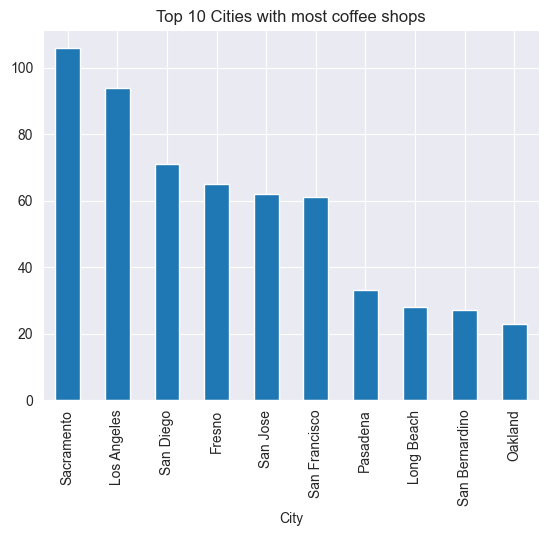

In [170]:
ax = coffee_df['City'].value_counts().head(10).plot(kind='bar')
ax.set_title("Top 10 Cities with most coffee shops")

In [171]:
coffee_df.sort_values(by="Latte Price", ascending=False).head(10)[['Business Name','City','Latte Price']]

,Business Name,City,Latte Price
995,Sip & Stories,San Bernardino,6.48000
367,Urban Brewtropolis,Palo Alto,5.87770
463,The Roast Refinery,Santa Clara,5.85815
417,Coffee Coziness,Palo Alto,5.81570
938,Steamy Moments,Long Beach,5.81020
97,Brewed Beauty,Long Beach,5.79420
736,Cup of Comfort,Pasadena,5.79105
486,Perk Paradise,Corona,5.77675
188,Mug Magic,Santa Cruz,5.77595
661,Cup of Comfort,Corona,5.77075


These are the top 10 costiliest lattes

In [172]:
coffee_df['Gender majority'].value_counts()

Gender majority
Male      511
Female    489
Name: count, dtype: int64

<Axes: xlabel='Gender majority', ylabel='count'>

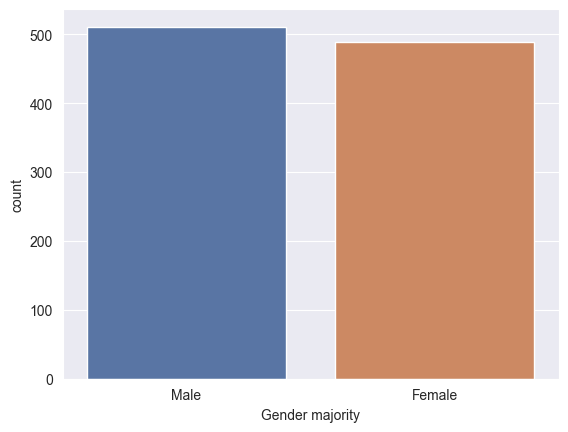

In [173]:
sns.set_style('darkgrid')
sns.countplot(data=coffee_df, x="Gender majority", palette="deep")


In [174]:
population_df.sample(5)

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
1163,8600000US95113,ZCTA5 95113,1,Total population,575,NaN,342,184,38,7,3,0,1
1701,8600000US96148,ZCTA5 96148,1,Total population,318,NaN,92,113,42,35,21,8,7
25,8600000US90022,ZCTA5 90022,1,Total population,17023,NaN,2199,2936,2818,3040,2522,1535,1973
609,8600000US92805,ZCTA5 92805,1,Total population,17599,NaN,2723,3299,2424,2855,2351,1565,2382
1421,8600000US95626,ZCTA5 95626,1,Total population,1924,NaN,307,583,393,290,180,85,86


In [175]:
population_df.sort_values(by="Total",ascending=False)[:10]

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
947,8600000US94109,ZCTA5 94109,1,Total population,33342,NaN,19444,9845,2373,1064,356,149,111
85,8600000US90250,ZCTA5 90250,1,Total population,31087,NaN,7513,7533,5563,4695,2978,1466,1339
48,8600000US90046,ZCTA5 90046,1,Total population,28534,NaN,14976,9648,2413,1088,284,81,44
132,8600000US90650,ZCTA5 90650,1,Total population,27130,NaN,3417,5446,4462,4904,3713,2231,2957
948,8600000US94110,ZCTA5 94110,1,Total population,27128,NaN,8588,8617,4395,2778,1210,665,875
592,8600000US92683,ZCTA5 92683,1,Total population,26223,NaN,4296,6528,4495,4547,2781,1632,1944
307,8600000US91910,ZCTA5 91910,1,Total population,26063,NaN,6085,6938,4652,4302,2314,997,775
160,8600000US90805,ZCTA5 90805,1,Total population,26056,NaN,4559,5097,4555,4346,3310,1892,2297
1029,8600000US94565,ZCTA5 94565,1,Total population,25761,NaN,4471,6403,4638,4333,2857,1568,1491
36,8600000US90034,ZCTA5 90034,1,Total population,25592,NaN,9371,8355,3708,2357,1035,429,337


## Data Preprocessing

In [176]:
coffee_df.isnull().sum()

ID no.             0
Business Name      0
Street address     0
City               0
State              0
Zip Code           0
Phone              0
Rating             0
Gender majority    0
Median Salary      0
Latte Price        0
dtype: int64

No null values in any columns

In [177]:
coffee_df.sample(3)

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
5,6,Espresso Elegance,8427 Atwood Road,Visalia,California,93291,559-929-4731,1.20,Female,78753,5.31765
608,609,Steamy Moments,9019 Susan Court,Newport Beach,California,92662,949-588-6007,4.37,Male,85859,5.58895
73,74,Brewed Brilliance,9 Oak Point,Whittier,California,90605,562-221-2757,4.10,Male,76893,4.99465


In [178]:
coffee_df['Zip Code'] = coffee_df['Zip Code'].astype(str)

In [179]:
population_df.sample(3)

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
1141,8600000US95037,ZCTA5 95037,1,Total population,14904,NaN,2454,4631,2582,2737,1367,622,511
571,8600000US92637,ZCTA5 92637,1,Total population,11143,NaN,6784,4064,255,35,3,1,1
891,8600000US93921,ZCTA5 93921,1,Total population,1881,NaN,868,757,158,74,20,1,3


In [180]:
## This function finds the last 5 digits from the string
def find_zip_code(geocode):
    pattern = r'\d{5}$'
    
    match = re.search(pattern, geocode)
    
    if match:
        zip_code = match.group(0)
    
    return zip_code
    

In [181]:
## New feature 'Zip Code' using geography feature and extracting last 5 digits
population_df['Zip Code'] = population_df['Geography'].apply(find_zip_code)

In [182]:
cafe_data = coffee_df.copy()

In [183]:
coffee_df = pd.merge(cafe_data, population_df)

In [184]:
coffee_df.columns

Index(['ID no.', 'Business Name', 'Street address', 'City', 'State',
       'Zip Code', 'Phone', 'Rating', 'Gender majority', 'Median Salary',
       'Latte Price', 'Geography', 'Label for GEO_ID', 'Race/Ethnic Group',
       'Population Groups', 'Total', 'Errata of Total',
       'Total!!1-person household', 'Total!!2-person household',
       'Total!!3-person household', 'Total!!4-person household',
       'Total!!5-person household', 'Total!!6-person household',
       'Total!!7-or-more-person household'],
      dtype='object')

In [185]:
coffee_df.shape

(412, 24)

In [186]:
columns = cafe_data.columns.values.tolist()+['Total']
columns

['ID no.',
 'Business Name',
 'Street address',
 'City',
 'State',
 'Zip Code',
 'Phone',
 'Rating',
 'Gender majority',
 'Median Salary',
 'Latte Price',
 'Total']

In [187]:
coffee_df = coffee_df[columns]

In [188]:
coffee_df = coffee_df.rename(columns={"Total": "Population"})

In [189]:
coffee_df.sample(5)

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price,Population
224,546,Sip & Stories,72714 Kedzie Way,North Hollywood,California,91606,818-710-5738,1.27,Female,73193,4.32565,14903
238,583,Coffee Coziness,44 Sherman Park,Newport Beach,California,92662,949-393-7143,4.33,Female,85859,5.32095,1526
358,854,The Roast Refinery,96 Mallard Hill,Los Angeles,California,90035,818-602-2813,4.33,Female,87604,5.52620,12814
172,417,Bean Brilliance,9412 Monica Parkway,San Jose,California,95128,714-655-1810,4.42,Female,84929,5.39845,13446
219,525,Espresso Exuberance,3834 Ridge Oak Street,Los Angeles,California,90005,213-881-7823,5.00,Female,81489,5.27045,15044


In [190]:
coffee_df = coffee_df[['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population']]

In [191]:
coffee_df.shape

(412, 5)

In [192]:
coffee_shop_counts = coffee_df['Zip Code'].value_counts().reset_index()
coffee_shop_counts.sample(4)

,Zip Code,count
69,94605,3
6,92127,8
15,92056,8
67,95138,3


In [194]:
# coffee_df['Zip Code'] = coffee_df['Zip Code'].astype(str)
# coffee_shop_counts['Zip Code'] = coffee_shop_counts['Zip Code'].astype(str)

In [195]:
coffee_df = coffee_df.merge(coffee_shop_counts, on='Zip Code', how="left")

In [198]:
coffee_df.sample(10)

,Zip Code,Rating,Median Salary,Latte Price,Population,count
8,95828,3.90,83453,5.32665,17168,6
293,92555,1.81,87654,5.09870,10798,8
268,91411,4.77,76034,4.95770,9177,8
410,90035,3.00,87604,4.64000,12814,5
277,92648,1.78,72745,4.61325,19453,7
229,93591,1.91,79549,5.19545,1982,5
233,91406,4.82,75798,5.15990,17042,6
354,90020,4.40,82047,4.83035,16514,7
241,95818,1.57,83618,5.36690,9370,5
169,91505,4.62,88333,5.24265,13180,5


Criteria:<br>
a. High Population <br>
b. Low total number of coffee shops <br>
c. Low rating <br>
d. high median salary <br>

In [201]:
coffee_df = coffee_df.rename(columns={"count":"CoffeeShopCount"})

In [212]:
sorted_df = coffee_df.sort_values(by=["Population","CoffeeShopCount","Rating", "Median Salary"], 
                                  ascending=[False,True,True,False]).reset_index(drop=True)

89948

In [213]:
sorted_df.head(10)

,Zip Code,Rating,Median Salary,Latte Price,Population,CoffeeShopCount
0,94110,2.22,74020,5.04500,27128,5
1,94110,3.50,74020,5.04700,27128,5
2,94110,4.40,74020,5.05900,27128,5
3,94110,4.50,74020,4.77900,27128,5
4,94110,4.70,74020,4.58100,27128,5
5,90805,3.00,88140,5.47900,26056,4
6,90805,3.89,88140,5.31900,26056,4
7,90805,4.31,88140,5.02100,26056,4
8,90805,4.37,88140,5.20700,26056,4
9,95823,4.30,73165,4.96825,22470,3


In [208]:
lst = []

for i in range(len(sorted_df)):
    if len(lst) !=5:
        if (sorted_df['Zip Code'][i] not in lst ):
            lst.append(sorted_df['Zip Code'][i])
            
lst

['94110', '90805', '95823', '94544', '90025']